# Gardening-robot

## Criando um Robô Jardineiro 

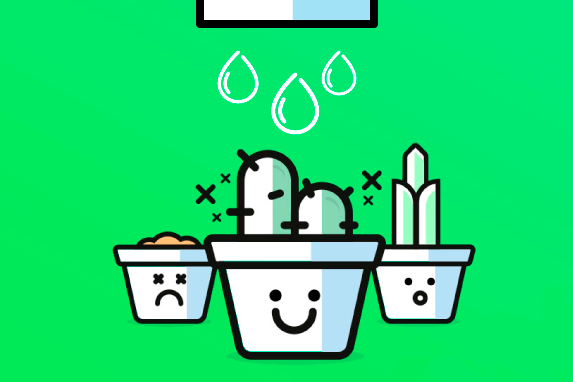

In [3]:
from IPython.display import Image
Image("p.png")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


Bad key "ytick.alignment" on line 268 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "xtick.alignment" on line 250 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Explorando dados

In [2]:
df = pd.read_csv('plantacao.csv')

In [3]:
df.columns

Index([u'ID', u' MES', u' DIA', u' Hora', u' umidade '], dtype='object')

In [4]:
len(df)

5403

### Pre-processando dados

In [32]:
df.describe()

,ID,MES,DIA,Hora,umidade
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2.931890,5.514344,20.991116,11.572090,60.335739
std,0.990788,0.499840,1.396667,7.030724,25.768100
min,1.000000,5.000000,19.000000,0.000000,0.000000
25%,2.000000,5.000000,20.000000,5.000000,47.000000
50%,3.000000,6.000000,21.000000,12.000000,64.000000
75%,4.000000,6.000000,22.000000,18.000000,81.000000
max,4.000000,6.000000,23.000000,23.000000,99.000000


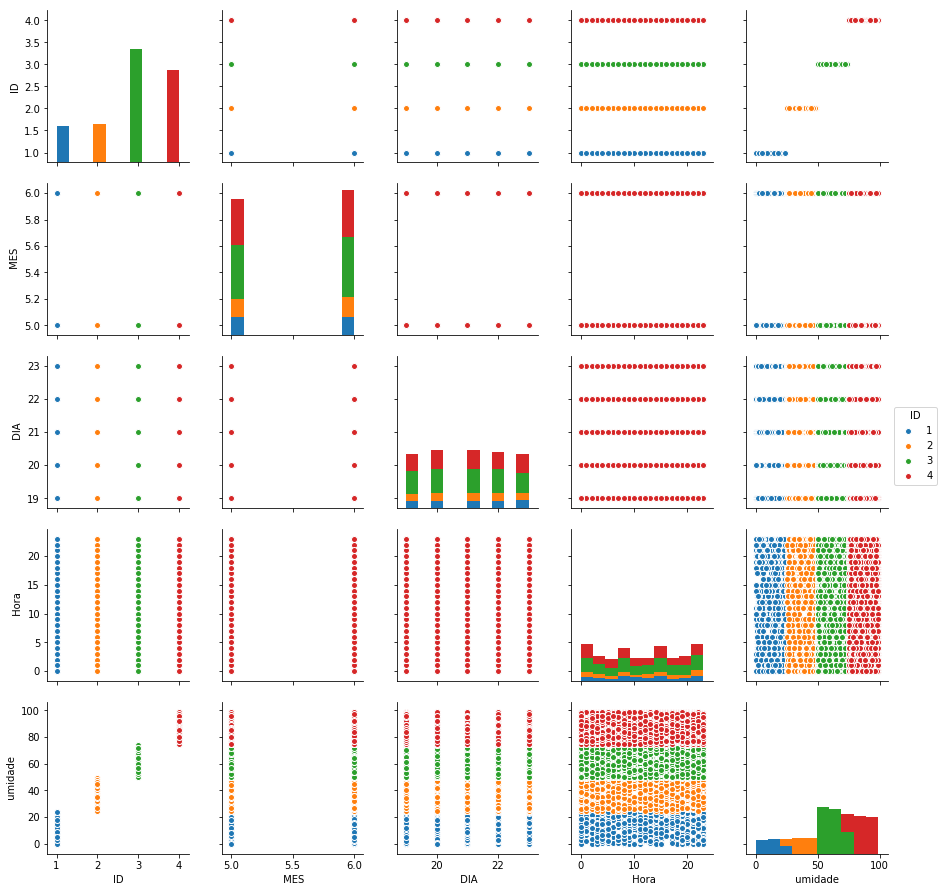

In [15]:
#sb.pairplot(df, hue='ID')
sb.pairplot(df,hue='ID')

In [16]:
import matplotlib.pyplot as plt

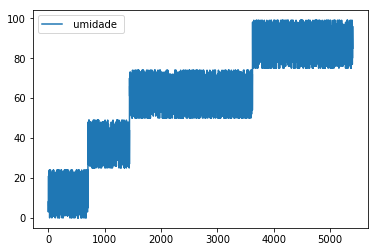

In [17]:
umidade = df[df.columns[4:]] 
umidade.plot()


## Criando Variavel de Treino

In [18]:
#print df.drop('ID',axis = 1)
X = np.array(df.drop('ID',axis = 1))
X

array([[ 6, 21, 11,  8],
       [ 5, 22,  3,  3],
       [ 6, 22, 22, 11],
       ...,
       [ 6, 20, 20, 92],
       [ 5, 23, 15, 86],
       [ 5, 23, 23, 85]])

## Criando Variavel de Test

In [19]:
y = np.array(df["ID"])
y

array([1, 1, 1, ..., 4, 4, 4])

## Classificando com KNN 
#### Aqui basicamente vamos pegar nossas variaveis de treino e test e vamos aplicar no classificador que irá aprender de acordo com os dados que colocamos como entrada

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=4)

In [22]:
#print X
#print y
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

## Fazendo uma Predição com dados novos de outro sensor

In [23]:
def predicao(lista):
 nivel =  knn.predict([lista])
 if nivel[0] == 1: return "arido"
 if nivel[0] == 2: return "seco"
 if nivel[0] == 3: return "umido"
 if nivel[0] == 4: return "molhado"

In [24]:
MES = raw_input("MES: ")
DIA = raw_input("DIA: ")
Hora = raw_input("Hora: ")
umidade = raw_input("umidade ")
lista = [MES,DIA, Hora, umidade]
pred = predicao(lista)
print pred

MES: 5
DIA: 2
Hora: 15
umidade 80
molhado


## Metricas de Avaliação

In [25]:
from sklearn.metrics import accuracy_score

### Accuracy com Score

In [26]:
y_pred_val = knn.predict(X)

precisao =  float(accuracy_score(y, y_pred_val))* 100
print  precisao

99.6853599852
